**Importação das Bibliotecas**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, balanced_accuracy_score, classification_report


**Upload do Modelo Usado**

In [10]:
from google.colab import files
uploaded = files.upload()

Saving wine+quality.zip to wine+quality (2).zip


**Verificação de Arquivos no zip**

In [11]:
import zipfile

with zipfile.ZipFile("wine+quality.zip", "r") as z:
    print(z.namelist())


['winequality-red.csv', 'winequality-white.csv', 'winequality.names']


**Carregamento e Verificação do DataSet**

In [26]:
with zipfile.ZipFile("wine+quality.zip") as z:
    with z.open("winequality-red.csv") as f:
        df = pd.read_csv(f, sep=';')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Pré-Processamento**

In [27]:
df["quality_label"] = df["quality"].apply(lambda x: "bom" if x >= 6 else "ruim")

X = df.drop(["quality", "quality_label"], axis=1)
y = df["quality_label"]

**Divisão de Treino e Teste**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Modelagem DecisionTreeClassifier**

Acurácia Balanceada: 0.74
                    precision    recall  f1-score   support

 Classificação bom       0.76      0.75      0.76       171
Classificação ruim       0.72      0.73      0.72       149

          accuracy                           0.74       320
         macro avg       0.74      0.74      0.74       320
      weighted avg       0.74      0.74      0.74       320



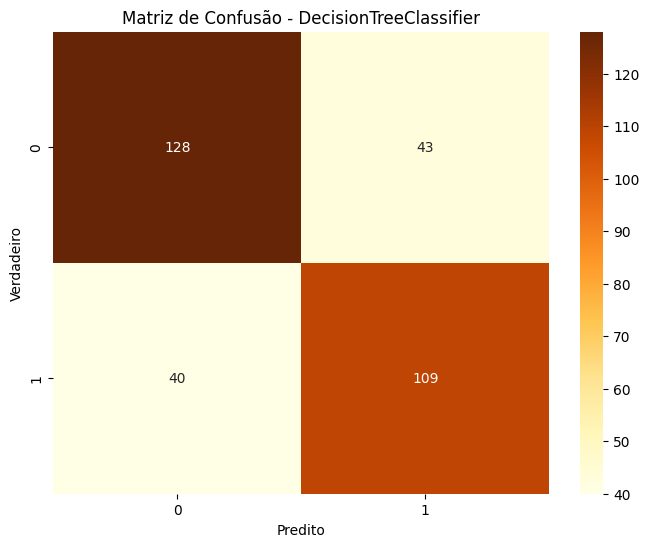

In [52]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, dt_pred)
print(f"Acurácia Balanceada: {balanced_acc:.2f}")

print(classification_report(y_test, dt_pred, target_names=[f'Classificação {i}' for i in sorted(y.unique())]))

cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Matriz de Confusão - DecisionTreeClassifier')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()


**Modelagem KNeighborsClassifier**

Acurácia Balanceada: 0.67
                    precision    recall  f1-score   support

 Classificação bom       0.70      0.70      0.70       171
Classificação ruim       0.65      0.65      0.65       149

          accuracy                           0.68       320
         macro avg       0.67      0.67      0.67       320
      weighted avg       0.68      0.68      0.68       320



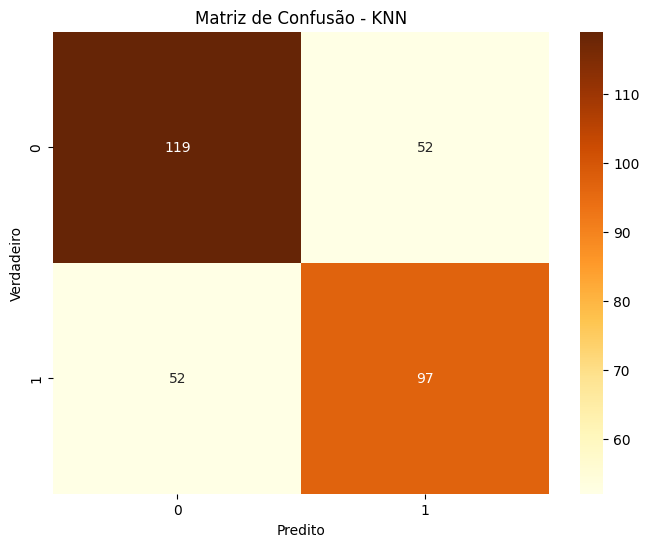

In [51]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, knn_pred)
print(f"Acurácia Balanceada: {balanced_acc:.2f}")

print(classification_report(y_test, knn_pred, target_names=[f'Classificação {i}' for i in sorted(y.unique())]))

cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Matriz de Confusão - KNN')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()


**Modelagem LogisticRegression**

Acurácia Balanceada: 0.75
                    precision    recall  f1-score   support

 Classificação bom       0.78      0.75      0.77       171
Classificação ruim       0.73      0.75      0.74       149

          accuracy                           0.75       320
         macro avg       0.75      0.75      0.75       320
      weighted avg       0.75      0.75      0.75       320



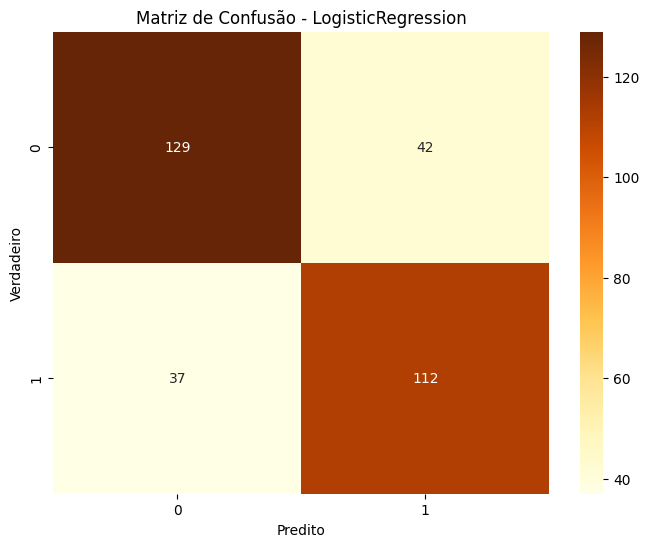

In [53]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, lr_pred)
print(f"Acurácia Balanceada: {balanced_acc:.2f}")

print(classification_report(y_test, lr_pred, target_names=[f'Classificação {i}' for i in sorted(y.unique())]))

cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Matriz de Confusão - LogisticRegression')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()